In [1]:
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import pandas as pd
import leafmap

In [2]:
gdf_manual = gpd.read_file("data/measurements/GA_5513_1739_2022_quantitative_status_monitoring_manual.json")
gdf_auto = gpd.read_file("data/measurements/GA_5513_1739_2022_quantitative_status_monitoring_automatic.json")

gdf_manual['date'] = pd.to_datetime(gdf_manual['date'])
gdf_manual = gdf_manual.dropna()

gdf_auto['date'] = pd.to_datetime(gdf_auto['date'])
gdf_auto = gdf_auto.dropna()

gdf = gdf_manual.append(gdf_auto, ignore_index=True)
gdf.drop_duplicates(subset=['date', 'name'], keep='first', inplace=True)

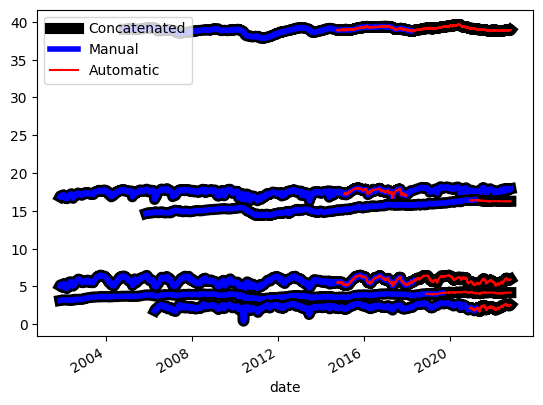

In [3]:
#auto stations are continuation of manual stations
ax = plt.gca()
for name in gdf_auto['name'].unique():
    gdf[gdf['name'] == name].plot(kind='line',x='date',y='value',ax=ax, c="black", label="Concatenated", style='-', linewidth=8)
    gdf_manual[gdf_manual['name'] == name].plot(kind='line',x='date',y='value', c="blue", ax=ax, label="Manual", style='-', linewidth=4)
    gdf_auto[gdf_auto['name'] == name].plot(kind='line',x='date',y='value',ax=ax, c="red", label="Automatic", style='-')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

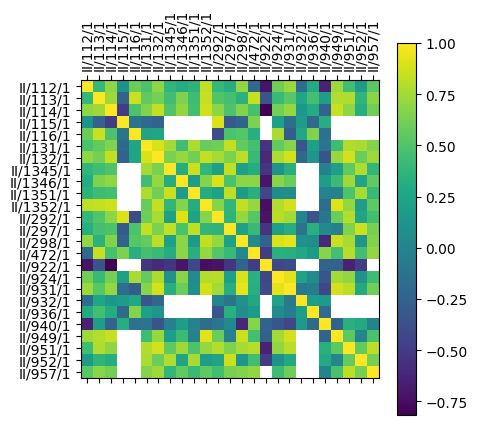

In [4]:
corr = gdf.set_index('date')
corr = corr.pivot(columns='name', values='value')
corr = corr.corr()
#plot correlation matrix
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

In [6]:
m = leafmap.Map()
m.add_gdf(gdf.drop(["date", "value"], axis=1).drop_duplicates(subset="geometry", keep="first"), layer_name="Stations", info_mode="on_click")
m.add_geojson("data/aoi.geojson", layer_name="AOI", info_mode="on_click")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…